In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=[224,224]

train_dir = 'run/train' 
val_dir = 'run/val'

In [ ]:
myResnet = ResNet50(input_shape=IMAGE_SIZE +[3], weights='imagenet' , include_top = False)     #initializing ResNet50 model
print (myResnet.summary())

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
for layer in myResnet.layers:       #setting layers as non-trinable
  layer.trainable=False

In [ ]:
Classes = glob('run/train/*')
print(Classes)

['/content/drive/MyDrive/LCC/Splitted_Dataset/train/Level 02', '/content/drive/MyDrive/LCC/Splitted_Dataset/train/Level 03', '/content/drive/MyDrive/LCC/Splitted_Dataset/train/Level 04', '/content/drive/MyDrive/LCC/Splitted_Dataset/train/Level 05']


In [ ]:
num_classes=len(Classes)  #Number of labelled classes in the dataset
print(num_classes)

4


In [11]:
PlusFlattenLayer=Flatten()(myResnet.output)                                  #adding layers
prediction= Dense(num_classes, activation='softmax')(PlusFlattenLayer)
model = Model(inputs = myResnet.input, outputs = prediction)
print (model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [12]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator     #using data augmentation

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. /255)

training_set= train_datagen.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

test_set= test_datagen.flow_from_directory(val_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='categorical')

Found 588 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [ ]:
result=model.fit(training_set,                     #training the model
                 validation_data=test_set,
                 epochs=50,
                 steps_per_epoch=len(training_set),
                 validation_steps=len(test_set))

Epoch 1/50
19/19 [==============================] - 198s 11s/step - loss: 1.7180 - accuracy: 0.4388 - val_loss: 1.8549 - val_accuracy: 0.3166
Epoch 2/50
19/19 [==============================] - 13s 703ms/step - loss: 1.1991 - accuracy: 0.5102 - val_loss: 1.2557 - val_accuracy: 0.4874
Epoch 3/50
19/19 [==============================] - 13s 728ms/step - loss: 0.9775 - accuracy: 0.5850 - val_loss: 1.7414 - val_accuracy: 0.4372
Epoch 4/50
19/19 [==============================] - 14s 721ms/step - loss: 1.0768 - accuracy: 0.5374 - val_loss: 1.1194 - val_accuracy: 0.5176
Epoch 5/50
19/19 [==============================] - 13s 703ms/step - loss: 0.8548 - accuracy: 0.6293 - val_loss: 1.1821 - val_accuracy: 0.6030
Epoch 6/50
19/19 [==============================] - 13s 707ms/step - loss: 0.7862 - accuracy: 0.6820 - val_loss: 1.4050 - val_accuracy: 0.4874
Epoch 7/50
19/19 [==============================] - 14s 768ms/step - loss: 0.8456 - accuracy: 0.6616 - val_loss: 1.2111 - val_accuracy: 0.5427


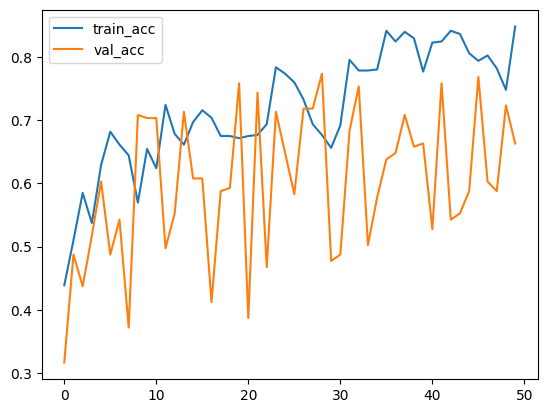

In [ ]:
plt.plot(result.history['accuracy'], label = 'train_acc')   #accuracy curve
plt.plot(result.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

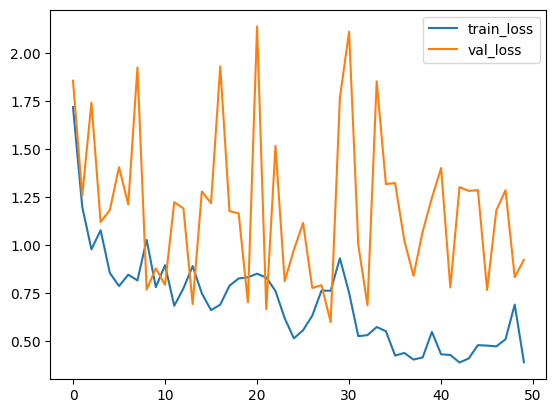

In [ ]:
plt.plot(result.history['loss'], label = 'train_loss')           #loss curve
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [14]:
model.save ('target/new_leaf_color_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras. preprocessing.image import load_img, img_to_array
import numpy as np

In [19]:
categories = ['Level 02', 'Level 03', 'Level 04', 'Level 05']

model= tf.keras.models.load_model('target/leaf_color_model.h5')          #loading the model
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [26]:
def predictImage(img_path):                                       #algorithm to predict image
  image = load_img(img_path, target_size=(224,224))
  img_result = img_to_array(image)
  img_result = np.expand_dims(img_result, axis = 0)
  img_result = img_result / 255.
  return img_result

test_img= "dataset/Level 04/IMG_20210721_095228.png"              #testing image

In [27]:
imgForModel = predictImage(test_img)
resultArray = model.predict(imgForModel, verbose=1)
answer = np.argmax (resultArray, axis = 1)

print(resultArray)
print(answer)


1/1 [==============================] - 0s 23ms/step
[[0.5812149  0.01073667 0.10614935 0.3018991 ]]
[0]


In [28]:
print(test_img)
index =answer[0]
print("predicted number:"+ categories[index])
print("Recommended fertilizer : Urea")

/content/drive/MyDrive/LCC/Splitted_Dataset/val/Level 04/IMG_20210721_095228.png
predicted number:Level 02
Recommended fertilizer : Urea
